In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn
import random

/home/manaswitar/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/manaswitar/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/home/manaswitar/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Generating the Data

In [3]:
categories=['Food','Fashion','Fitness','Health','Travel','Music','Culture','Family','Health']

In [4]:
n=100 #number of entries to generate
dict1 = {
    'Date': pd.date_range('2024-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}


In [5]:
#step3: loading the generated data onto a dataframe
data=pd.DataFrame(dict1)
print(data)

         Date Category  Likes
0  2024-01-01  Fashion   1756
1  2024-01-02   Family   4602
2  2024-01-03   Health   3598
3  2024-01-04   Health   5894
4  2024-01-05   Travel   6602
..        ...      ...    ...
95 2024-04-05  Fashion   8017
96 2024-04-06   Family   9579
97 2024-04-07   Family   4440
98 2024-04-08   Health   9993
99 2024-04-09     Food    295

[100 rows x 3 columns]


In [6]:
#description of the dataframe
data['Category'].value_counts() #count of category element

Category
Health     22
Fashion    16
Family     12
Travel     12
Music      12
Fitness    10
Culture     8
Food        8
Name: count, dtype: int64

In [7]:
data.head()                     #dataframe head
data.info()                     #dataframe information
data.describe()                 #dataframe description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      100 non-null    datetime64[ns]
 1   Category  100 non-null    object        
 2   Likes     100 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.5+ KB


,Date,Likes
count,100,100.000000
mean,2024-02-19 12:00:00,4768.200000
min,2024-01-01 00:00:00,151.000000
25%,2024-01-25 18:00:00,1828.750000
50%,2024-02-19 12:00:00,4482.500000
75%,2024-03-15 06:00:00,7307.750000
max,2024-04-09 00:00:00,9993.000000
std,NaN,3096.513618


## Cleaning the Data

In [8]:
#cleaning the data

#step1: removing all the null data & duplicate data
data=data.dropna()
data=data.drop_duplicates()

print(data.head())

        Date Category  Likes
0 2024-01-01  Fashion   1756
1 2024-01-02   Family   4602
2 2024-01-03   Health   3598
3 2024-01-04   Health   5894
4 2024-01-05   Travel   6602


In [9]:
#step2: Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

print(data.info()) #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      100 non-null    datetime64[ns]
 1   Category  100 non-null    object        
 2   Likes     100 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.5+ KB
None


In [10]:
#step3: converting 'Likes' to integers

data['Likes']=data['Likes'].astype(int)  #using astype method to change datatype of specified column to int

print(data.head())  #check

        Date Category  Likes
0 2024-01-01  Fashion   1756
1 2024-01-02   Family   4602
2 2024-01-03   Health   3598
3 2024-01-04   Health   5894
4 2024-01-05   Travel   6602


## Visualising and Analysing the Data

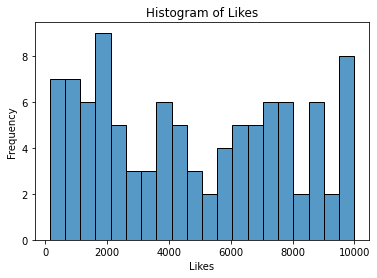

In [11]:
#Visualising and Analysing the Data
#using matplotlib and seaborn libraries

import matplotlib.pyplot as plt

#creating a histogram of 'Likes' column
sbn.histplot(data['Likes'], kde=False, bins=20)

#adding titles and labels
plt.title('Histogram of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')

#show the plot
plt.show()

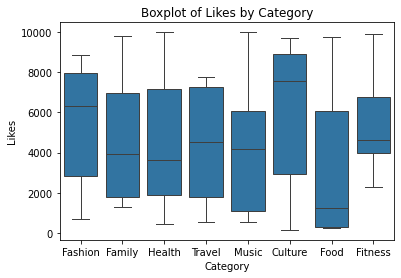

In [12]:
#creating a boxplot with xaxis as 'Category' and yaxis as 'Likes'

sbn.boxplot(x='Category',y='Likes',data=data)

#adding titles and labels
plt.title('Boxplot of Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')

plt.show()

In [16]:
#statistical analysis

mean_likes=data['Likes'].mean()
print("The Mean Likes is:", mean_likes)

median_likes=data['Likes'].median()
print("The Median Likes is:", median_likes)

standard_dev=data['Likes'].std()
print("The Standard Deviation of Likes is:", standard_dev)

variance=data['Likes'].var()
print("The Variance of Likes is:", variance)

#grouping by category and calculating the mean of Likes
category_mean=data.groupby('Category')['Likes'].mean()
print(category_mean)

The Mean Likes is: 4768.2
The Median Likes is: 4482.5
The Standard Deviation of Likes is: 3096.5136179029773
The Variance of Likes is: 9588396.585858585
Category
Culture    6066.500000
Family     4721.000000
Fashion    5269.125000
Fitness    5557.900000
Food       3238.375000
Health     4699.136364
Music      4122.916667
Travel     4415.666667
Name: Likes, dtype: float64


## Conclusion

#### From the above data, we can conclude that posts in the Culture category the most number of likes on average, followed closely by Fitness posts. These posts have the most viral or engaging content. Food and Music posts have the lowest average likes, suggesting less engagement. Family, Health, and Travel posts do moderately well.

#### The histogram shows that the data follows a bimodal distribution, with two peaks or cluster of values. Some posts receive very high likes (viral), while other posts receive very low likes (unpopular). The mean (4768) is slightly higher than the median (4482), suggesting either a right-skewed distribution, or a distrubution that is not strictly unimodal or normal. 

#### The standard deviation (3096.51) and variance (9588396.58) are quite large compared to the mean, indicating a high variability in Likes. This suggests that Likes differ significantly across categories and posts, with some posts receiving very few likes and others receiving a lot.

